# General aim of this notebook

This notebook investigates the correlation between the different features (i.e. brain regions)

### Load data

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from scikeras.wrappers import KerasClassifier, KerasRegressor


In [23]:
#--------data paths------------------------------------------------------------------------------------------
data_train_path = 'C:/Users/manon/Desktop/Projet_2 _ML/code/datas/Split_48_neutre/Combined_All_Train_80.csv'
data_test_path = 'C:/Users/manon/Desktop/Projet_2 _ML/code/datas/Split_48_neutre/Combined_All_Test_80.csv'

#--------loading the data and spliting between features and predictions--------------------------------------
tx_train = pd.read_csv(data_train_path,sep=",",squeeze=True)
X_train=tx_train.iloc[:, :48]
ytr = pd.read_csv(data_train_path,sep=",",usecols=[48],squeeze=True)

tx_test = pd.read_csv(data_test_path,sep=",",squeeze=True)
X_test=tx_test.iloc[:, :48]
yte = pd.read_csv(data_test_path,sep=",",usecols=[48],squeeze=True)

#---------Adding features name (i.e. number of the brain region represented by the feature)------------------
def add_column_names(data):
    
    liste=[]
    for i in range(48):
        liste.append(str(i+1))
    data.columns=liste
    return data,liste

X_train,liste = add_column_names(X_train)
X_test,liste = add_column_names(X_test)

#---------Convert y to int to be compatible with future prediction--------------------------------------------
ytr = ytr.astype(np.int64)
yte = yte.astype(np.int64)

### Correlation between features

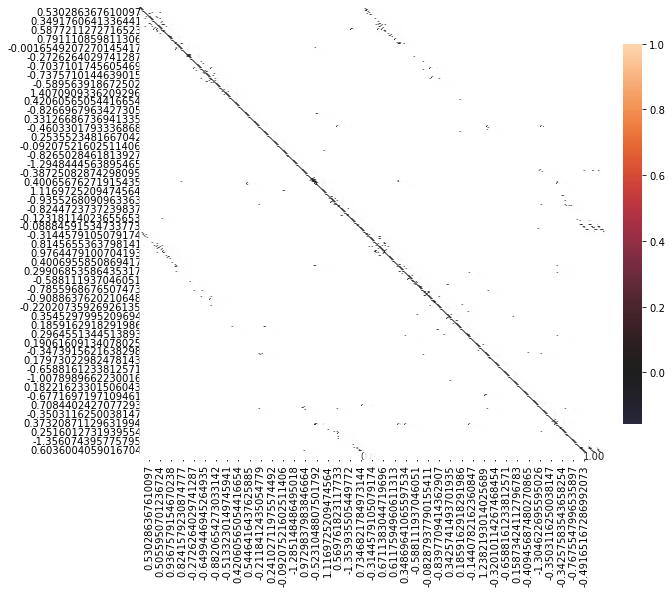

In [4]:
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(X)

In [18]:
corr = X_train.corr()
correlated_features=set()
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.8:
            colname = corr.columns[i]
            correlated_features.add(colname)